<a href="https://colab.research.google.com/github/dipankar05/ML-polymer/blob/main/AI_Polymer_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Facile Media Polarity Control (MPC) Strategy to Tailor the Toughness & Adhesive Strength of Dual Monomer Single Network Hydrogels and Integrated Machine Learning Approach**

In [2]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Uploaded polymer properties file (Sample_DataSet_AIHydrogel.xlsx) in google drive and copy the id
# Example: https://docs.google.com/spreadsheets/d/1klyxBhW5p65clp3qFyyBjJ5yyi5lXo7Q/edit?usp=sharing&ouid=116407262400661345768&rtpof=true&sd=true
file_id = '1klyxBhW5p65clp3qFyyBjJ5yyi5lXo7Q'
downloaded = drive.CreateFile({'id': file_id})

In [5]:
# Download the file to a local disk .
downloaded.GetContentFile('Sample_DataSet_AIHydrogel.xlsx')
# Here it is --
!ls -lha Sample_DataSet_AIHydrogel.xlsx

-rw-r--r-- 1 root root 135K Feb  6 17:33 Sample_DataSet_AIHydrogel.xlsx


In [6]:
# Now, we can use pandas read_excel after installing the excel importer.
!pip install -q xlrd

import pandas as pd
Ym = pd.read_excel('Sample_DataSet_AIHydrogel.xlsx')
Ym

,Sl. No.,Solvent_Category,Solvent_amount (mL),Solvent_content (%),Polarity_Index,AMPS (g),AAm (g),PEGDA (uL),VarName,Varval,UTS (kPa),Elong. (%),YMod (kPa)
0,1,0,1.50,62.50,10.200,0.450,0.450,2,UTS (kPa),75.0,75.0,250,90
1,2,1,1.50,62.50,9.570,0.450,0.450,2,UTS (kPa),110.0,110.0,1050,60
2,19,1,1.50,66.40,9.570,0.450,0.308,2,UTS (kPa),12.5,12.5,580,6
3,20,1,1.50,71.30,9.570,0.450,0.154,2,UTS (kPa),6.0,6.0,910,2
4,21,1,1.50,62.50,9.570,0.450,0.450,6,UTS (kPa),50.0,50.0,300,40
5,22,6,1.50,62.50,9.255,0.450,0.450,1,UTS (kPa),20.0,20.0,270,15
6,41,11,1.50,62.50,9.696,0.450,0.450,4,UTS (kPa),44.0,44.0,420,28
7,42,1,1.50,57.69,9.570,0.650,0.450,2,UTS (kPa),65.0,65.0,1000,20
8,43,1,1.50,65.94,9.570,0.325,0.450,2,UTS (kPa),54.0,54.0,1150,12
9,44,1,1.50,58.43,9.570,0.450,0.617,2,UTS (kPa),45.0,45.0,1110,18


In [9]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_absolute_error

#rmse estimation
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

########################

##-----------------------------------------------------------------------------
# Read properties
x1 = np.float64(Ym['UTS (kPa)'])
x2 = np.float64(Ym['Elong. (%)'])
x3 = np.float64(Ym['YMod (kPa)'])

##-----------------------------------------------------------------------------
# Read data
y1 = np.float64(Ym['Solvent_Category'])
y2 = np.float64(Ym['Solvent_amount (mL)'])
y3 = np.float64(Ym['Solvent_content (%)'])
y4 = np.float64(Ym['Polarity_Index'])
y5 = np.float64(Ym['AMPS (g)'])
y6 = np.float64(Ym['AAm (g)'])
y7 = np.float64(Ym['PEGDA (uL)'])

##-----------------------------------------------------------------------------
##-----------------------------------------------------------------------------

##-------------Support vector classification
from sklearn.svm import SVC
modelc = SVC(kernel='rbf', C=4, gamma=0.01, random_state=1)
##-----------------------------------------------------------------------------
# y3 = np.float64(Ymv['Solvent_content (%)'])
# y4 = np.float64(Ymv['Polarity_Index'])
Xc = np.column_stack((y3, y4))
Yc =y1
# Model training
modelc.fit(Xc, Yc)


##-----------------------------------------------------------------------------
## Main regression model
X = np.column_stack((x1, x2, x3))
Y =np.column_stack((y2, y3, y4, y5, y6, y7))
# define the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=450, criterion='friedman_mse', max_depth=None,bootstrap=True,
                                                         min_impurity_decrease=0.01,
                                                          min_samples_leaf=2,random_state=15))
###-----------------------------------------------------------------------------
## Model fitting
# Fitting RF with training data
model.fit(X, Y)

MultiOutputRegressor(estimator=RandomForestRegressor(criterion='friedman_mse',
                                                     min_impurity_decrease=0.01,
                                                     min_samples_leaf=2,
                                                     n_estimators=450,
                                                     random_state=15))

# **Final plotting code**

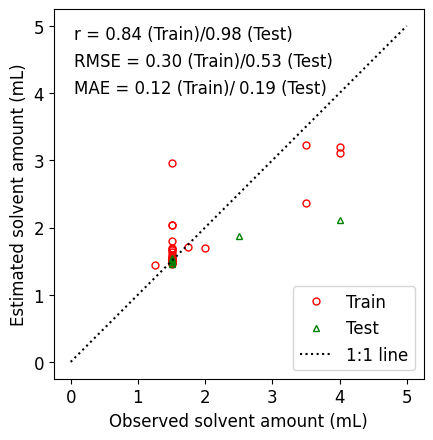

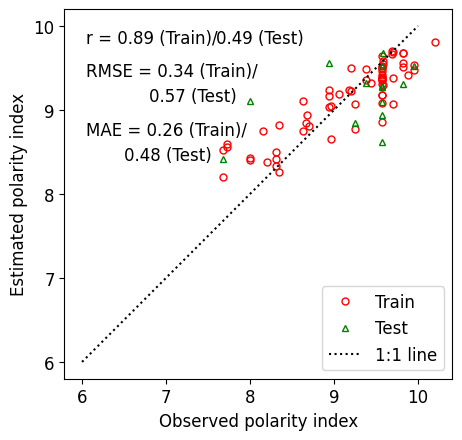

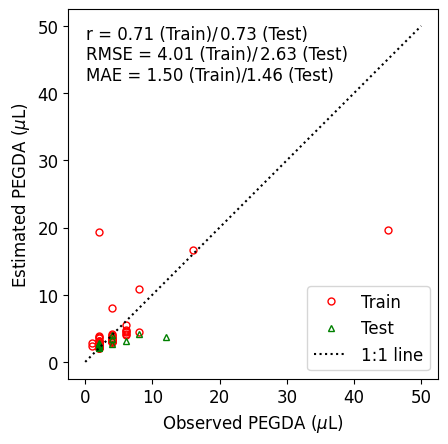

In [12]:

# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_absolute_error

#rmse estimation
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


########################
Ym = pd.read_excel('Sample_DataSet_AIHydrogel.xlsx')

##-----------------------------------------------------------------------------
# Read Soil properties
x1 = np.float64(Ym['UTS (kPa)'])
x2 = np.float64(Ym['Elong. (%)'])
x3 = np.float64(Ym['YMod (kPa)'])

##-----------------------------------------------------------------------------
# Read sensor data
y1 = np.float64(Ym['Solvent_Category'])
y2 = np.float64(Ym['Solvent_amount (mL)'])
y3 = np.float64(Ym['Solvent_content (%)'])
y4 = np.float64(Ym['Polarity_Index'])
y5 = np.float64(Ym['AMPS (g)'])
y6 = np.float64(Ym['AAm (g)'])
y7 = np.float64(Ym['PEGDA (uL)'])

##-----------------------------------------------------------------------------
##-----------------------------------------------------------------------------

##-------------Support vector classification
from sklearn.svm import SVC
modelc = SVC(kernel='rbf', C=4, gamma=0.01, random_state=1)
##-----------------------------------------------------------------------------
# y3 = np.float64(Ymv['Solvent_content (%)'])
# y4 = np.float64(Ymv['Polarity_Index'])
Xc = np.column_stack((y3, y4))
Yc =y1
# Model training
modelc.fit(Xc, Yc)


##-----------------------------------------------------------------------------
# Read validation data
Ymt = pd.read_excel('Sample_DataSet_AIHydrogel.xlsx', sheet_name='train', na_values = ['no info', '.','None','#VALUE!', '#DIV/0!'])
#Data cleaning

##-----------------------------------------------------------------------------
# Read properties
x1 = np.float64(Ymt['UTS (kPa)'])
x2 = np.float64(Ymt['Elong. (%)'])
x3 = np.float64(Ymt['YMod (kPa)'])

##-----------------------------------------------------------------------------
# Read data
y2 = np.float64(Ymt['Solvent_amount (mL)'])
y4 = np.float64(Ymt['Polarity_Index'])
y5 = np.float64(Ymt['AMPS (g)'])
y6 = np.float64(Ymt['AAm (g)'])
y7 = np.float64(Ymt['PEGDA (uL)'])



## Main regression model
X = np.column_stack((x1, x2, x3))
Y =np.column_stack((y2, y4, y5, y6, y7))

# define the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=350, criterion='friedman_mse', max_depth=None,bootstrap=True,
                                                         min_impurity_decrease=0.01,
                                                          min_samples_leaf=2,random_state=10))

##------------------------------------
###-----------------------------------------------------------------------------
## Model fitting
# Fitting RF with training data
model.fit(X, Y)
# Predict on train data
Ytrain_out = model.predict(X)

# Read validation data
Ymv = pd.read_excel('Sample_DataSet_AIHydrogel.xlsx', sheet_name='val', na_values = ['no info', '.','None','#VALUE!', '#DIV/0!'])

##-----------------------------------------------------------------------------
# Read Soil properties
x1 = np.float64(Ymv['UTS (kPa)'])
x2 = np.float64(Ymv['Elong. (%)'])
x3 = np.float64(Ymv['YMod (kPa)'])

##-----------------------------------------------------------------------------
# Read sensor data
y1 = np.float64(Ymv['Solvent_Category'])
y2 = np.float64(Ymv['Solvent_amount (mL)'])
y3 = np.float64(Ymv['Solvent_content (%)'])
y4 = np.float64(Ymv['Polarity_Index'])
y5 = np.float64(Ymv['AMPS (g)'])
y6 = np.float64(Ymv['AAm (g)'])
y7 = np.float64(Ymv['PEGDA (uL)'])

##-----------------------------------------------------------------------------

Xval = np.column_stack((x1, x2, x3))
Yval = np.column_stack((y2, y4, y5, y6, y7))
#Estimate with trained MTRFR model
y_out = model.predict(Xval)


##---------------
#RMSE
rmseom = rmse(np.array(Yval[:,2]), np.array(y_out[:,2]))
#Mean absolute error
maeom=mean_absolute_error(Yval[:,2],y_out[:,2])

#------------------------------------------------------------------------------
######################################
## Plotting Solvent amount-----------------------------------------------------
#Train data error
#Correlation coefficient
corrtrain=np.corrcoef(np.array(Ytrain_out[:,0]), np.array(Y[:,0]))
rrtrain= corrtrain[0,1]
#RMSE
rmsetrain = rmse(np.array(Ytrain_out[:,0]), np.array(Y[:,0]))
#Mean absolute error
maetrain = mean_absolute_error(Ytrain_out[:,0], Y[:,0])
#Test data error
#Correlation coefficient
corrtest=np.corrcoef(np.array(y_out[:,0]), np.array(Yval[:,0]))
rrtest= corrtest[0,1]
#RMSE
rmsetest = rmse(np.array(y_out[:,0]), np.array(Yval[:,0]))
#Mean absolute error
maetest = mean_absolute_error(y_out[:,0], Yval[:,0])
#Train-Test data plotting

#define font family to use for all text
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']

matplotlib.rcParams.update({'font.size': 12})
plt.plot(Y[:,0], Ytrain_out[:,0],  'ro', markersize=5, markerfacecolor='None', markeredgecolor='r', label = "Train")
plt.plot(Yval[:, 0], y_out[:, 0], 'g^', markersize=5, markerfacecolor='None', markeredgecolor='g', label = "Test")
# plt.plot(Ytest,y_out, 'g^', label = "Test")
plt.xlabel('Observed solvent amount (mL)')
plt.ylabel('Estimated solvent amount (mL)')
plt.plot([0, 5], [0, 5], 'k:', label = "1:1 line")
plt.gca().set_aspect('equal', adjustable='box')
matplotlib.rcParams.update({'font.size': 12})
plt.annotate('r = %.2f (Train)/'%rrtrain, xy=(0.05, 4.8))#round off upto 2decimals
plt.annotate('%.2f (Test)'%rrtest, xy=(2.0, 4.8))#round off upto 2decimals
plt.annotate('RMSE = %.2f (Train)/'%rmsetrain, xy=(0.05, 4.4))
plt.annotate('%.2f (Test)'%rmsetest, xy=(2.6, 4.4))
plt.annotate('MAE = %.2f (Train)/'%maetrain, xy=(0.05, 4.0))
plt.annotate('%.2f (Test)'%maetest, xy=(2.5, 4.0))
plt.legend(loc='lower right')
plt.savefig('Regression_Solvent amount.png',bbox_inches="tight",dpi=450)
plt.show()



## Plotting Polarity index-----------------------------------------------------
#Train data error
#Correlation coefficient
corrtrain=np.corrcoef(np.array(Ytrain_out[:,1]), np.array(Y[:,1]))
rrtrain= corrtrain[0,1]
#RMSE
rmsetrain = rmse(np.array(Ytrain_out[:,1]), np.array(Y[:,1]))
#Mean absolute error
maetrain = mean_absolute_error(Ytrain_out[:,1], Y[:,1])
#Test data error
#Correlation coefficient
corrtest=np.corrcoef(np.array(y_out[:,1]), np.array(Yval[:,1]))
rrtest= corrtest[0,1]
#RMSE
rmsetest = rmse(np.array(y_out[:,1]), np.array(Yval[:,1]))
#Mean absolute error
maetest = mean_absolute_error(y_out[:,1], Yval[:,1])
#Train-Test data plotting
fig, ax = plt.subplots()
ax.set_yticks((6, 7, 8, 9, 10))

matplotlib.rcParams.update({'font.size': 12})
plt.plot(Y[:,1], Ytrain_out[:,1],  'ro', markersize=5, markerfacecolor='None', markeredgecolor='r', label = "Train")
plt.plot(Yval[:, 1], y_out[:, 1], 'g^', markersize=5, markerfacecolor='None', markeredgecolor='g', label = "Test")
# plt.plot(Ytest,y_out, 'g^', label = "Test")
plt.xlabel('Observed polarity index')
plt.ylabel('Estimated polarity index')
plt.plot([6, 10], [6, 10], 'k:', label = "1:1 line")
plt.gca().set_aspect('equal', adjustable='box')
matplotlib.rcParams.update({'font.size': 12})
plt.annotate('r = %.2f (Train)/'%rrtrain, xy=(6.05, 9.8))#round off upto 2decimals
plt.annotate('%.2f (Test)'%rrtest, xy=(7.6, 9.8))#round off upto 2decimals
plt.annotate('RMSE = %.2f (Train)/'%rmsetrain, xy=(6.05, 9.4))
plt.annotate('%.2f (Test)'%rmsetest, xy=(6.8, 9.1))
plt.annotate('MAE = %.2f (Train)/'%maetrain, xy=(6.05, 8.7))
plt.annotate('%.2f (Test)'%maetest, xy=(6.5, 8.4))
plt.legend(loc='lower right')
plt.savefig('Regression_PolarityIndex.png',bbox_inches="tight",dpi=450)
plt.show()




## Plotting PEGDA (uL) -----------------------------------------------------
#Train data error
#Correlation coefficient
corrtrain=np.corrcoef(np.array(Ytrain_out[:,4]), np.array(Y[:,4]))
rrtrain= corrtrain[0,1]
#RMSE
rmsetrain = rmse(np.array(Ytrain_out[:,4]), np.array(Y[:,4]))
#Mean absolute error
maetrain = mean_absolute_error(Ytrain_out[:,4], Y[:,4])
#Test data error
#Correlation coefficient
corrtest=np.corrcoef(np.array(y_out[:,4]), np.array(Yval[:,4]))
rrtest= corrtest[0,1]
#RMSE
rmsetest = rmse(np.array(y_out[:,4]), np.array(Yval[:,4]))
#Mean absolute error
maetest = mean_absolute_error(y_out[:,4], Yval[:,4])
#Train-Test data plotting
matplotlib.rcParams.update({'font.size': 12})
plt.plot(Y[:,4], Ytrain_out[:,4],  'ro', markersize=5, markerfacecolor='None', markeredgecolor='r', label = "Train")
plt.plot(Yval[:, 4], y_out[:, 4], 'g^', markersize=5, markerfacecolor='None', markeredgecolor='g', label = "Test")
# plt.plot(Ytest,y_out, 'g^', label = "Test")
plt.xlabel('Observed PEGDA ($\mu$L)')
plt.ylabel('Estimated PEGDA ($\mu$L)')
plt.plot([0, 50], [0, 50], 'k:', label = "1:1 line")
plt.gca().set_aspect('equal', adjustable='box')
matplotlib.rcParams.update({'font.size': 12})
plt.annotate('r = %.2f (Train)/'%rrtrain, xy=(0.05, 48))#round off upto 2decimals
plt.annotate('%.2f (Test)'%rrtest, xy=(20, 48))#round off upto 2decimals
plt.annotate('RMSE = %.2f (Train)/'%rmsetrain, xy=(0.05, 45))
plt.annotate('%.2f (Test)'%rmsetest, xy=(26, 45))
plt.annotate('MAE = %.2f (Train)/'%maetrain, xy=(0.05, 42))
plt.annotate('%.2f (Test)'%maetest, xy=(24, 42))
plt.legend(loc='lower right')
plt.savefig('Regression_PEGDA.png',bbox_inches="tight",dpi=450)
plt.show()